# Ejercicios Unidad 1

1. Elija una de las imágenes color que tomó para la clase y aplique separación de canales y elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos.
2. Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen.
3. Para leer un paper, conviene arrancar leyendo el abstract, luego hacer una lectura por los títulos de las distintas secciones, prestar atención a las imágenes y su texto asociado, y leer con detalle la conclusión.
    
    Se dividirá la comisión completa en 5 grupos de dialogo, cada grupo tomará un paper diferente de los que se muestran en la sección “Técnicas de extracción de características mediante aprendizaje profundo.” Les proponemos hacer una primera lectura del mismo. Luego de la misma un par de valientes del grupo dará una breve presentación de los mismos.
    
    [01_superpoint.pdf](https://drive.google.com/file/d/1tx6GrL1Cr-LnQBSH1K9xffPxbasQugE9/view?usp=drive_web)
    
    [02_d2net.pdf](https://drive.google.com/file/d/1-b07QhWcRdQWYhZxQ6wY97KN_Oiu1M8L/view?usp=drive_web)
    
    [03_NeurIPS.pdf](https://drive.google.com/file/d/1su2irZiTg1brgTUaAGxgUquHzZDzp_7d/view?usp=drive_web)
    
    [04_liu2018.pdf](https://drive.google.com/file/d/1IQT7nKAHXQD7opxk7ws-mLok7NGdXe09/view?usp=drive_web)
    
    [05_Zhang_Deep_Graphical_Feature_Learning.pdf](https://drive.google.com/file/d/15mFrmQvKmCFX_WeFNYfticSOrOKcKVTL/view?usp=drive_web)
    
4. Con los videos de [youtube.com](http://youtube.com) de cámara fija pedidos para esta clase, aplicar los algoritmos de detección de movimiento vistos en la teoría.
5. (Entrega obligatoria individual en repo) Genere un video en un patio o en un hall de edificio donde en un principio se vea vacío y luego aparezca una persona. Mediante los métodos de motion detection (sin usar deep learning) logre una detección de la persona cuando entra al cuadro suponiendo la utilidad para una cámara de seguridad.
Luego sobre el mismo video aplique los algoritmos de flujo denso y disperso que se mostraron en clase.
Escriba una reflexión sobre los resultados en el formato md dentro del Jupyter Notebook.
6. (Entrega obligatoria individual en repo) Explique cuál es diferencia entre localización de objetos y clasificación de imágenes. Muestre ejemplos de ello.

#Descargar archivos

In [35]:
import gdown

url = 'https://drive.google.com/drive/folders/1t9DAx0lR9QyTePIKtm4mUb2J3bItFII8?usp=sharing'

output = 'vpc'

#gdown.download(url, output, quiet=False)
gdown.download_folder(url, quiet=True, output='vpc')

filename_in = 'vpc/camara_patio.mp4'


#Ejercicio 1

Shape de la imagen: (1600, 1200, 3).
Columnas (Ancho): 1200
Filas (Altura): 1600
Canales: 3
Tipo de dato del array: uint8


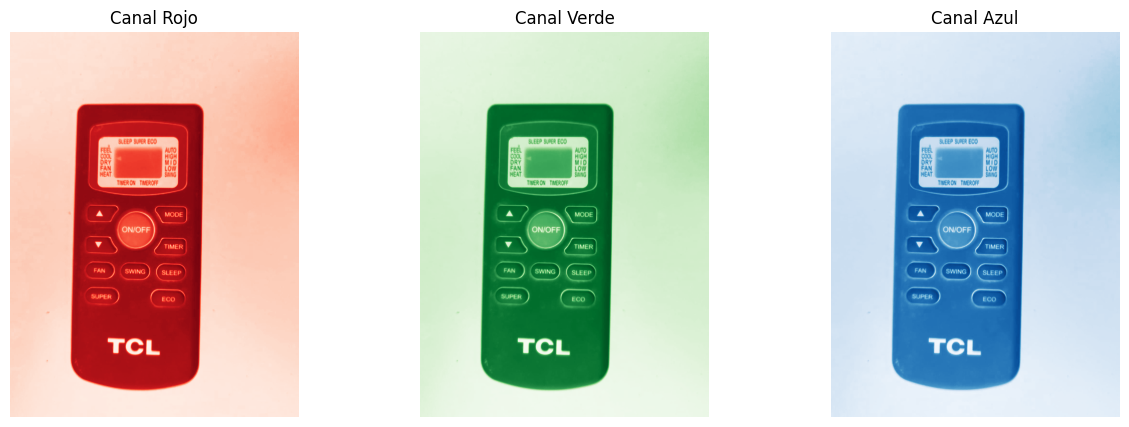

In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('vpc/control1.jpeg')

image_np = np.array(image)
print(f"Shape de la imagen: {image_np.shape}.")
print(f"Columnas (Ancho): {image_np.shape[1]}")
print(f"Filas (Altura): {image_np.shape[0]}")
print(f"Canales: {image_np.shape[2]}")
print(f"Tipo de dato del array: {image_np.dtype}")


R, G, B = image_np[:,:,0], image_np[:,:,1], image_np[:,:,2]


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

plt.show()


Shape de la imagen original (RGB): (1600, 1200, 3)
Tipo de dato del array de la imagen original: uint8
Shape de la imagen en escala de grises: (1600, 1200)
Tipo de dato del array de la imagen en escala de grises: uint8


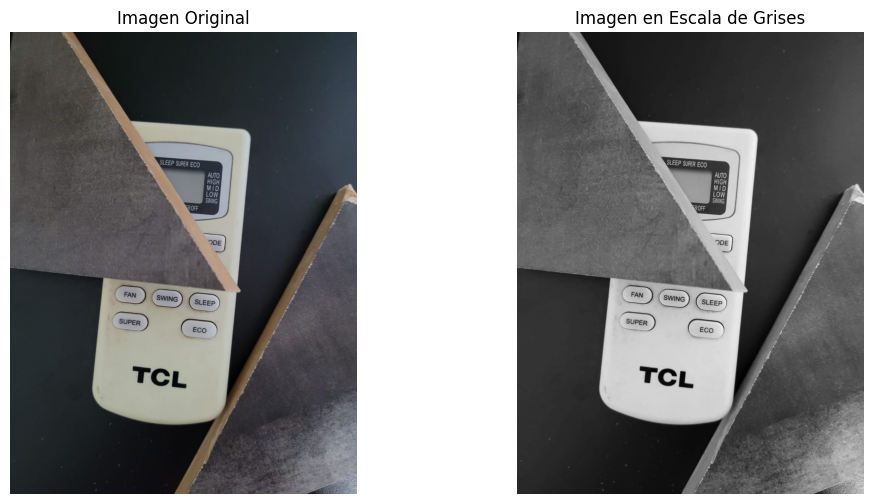

In [41]:
image_color = cv2.imread('vpc/control4.jpeg')

image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Imprimir el shape y el tipo de dato del array de la imagen original y en escala de grises
print(f"Shape de la imagen original (RGB): {image_rgb.shape}")
print(f"Tipo de dato del array de la imagen original: {image_rgb.dtype}")
print(f"Shape de la imagen en escala de grises: {image_gray.shape}")
print(f"Tipo de dato del array de la imagen en escala de grises: {image_gray.dtype}")

# Mostrar ambas imágenes, original y en escala de grises
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')

plt.show()

#Ejercicio 2

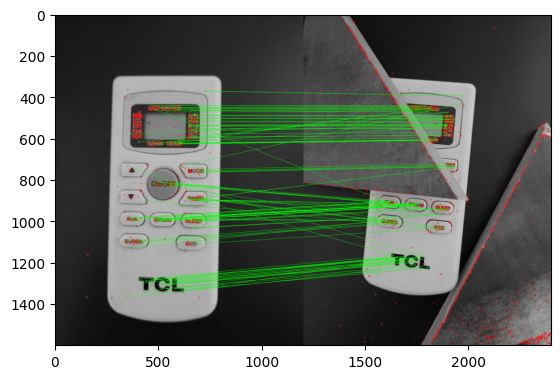

(<matplotlib.image.AxesImage at 0x7afd6d5f7ee0>, None)

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Cargar imágenes en escala de grises
img1 = cv.imread('vpc/control1.jpeg', cv.IMREAD_GRAYSCALE)          # Imagen de consulta (queryImage)
img2 = cv.imread('vpc/control4.jpeg', cv.IMREAD_GRAYSCALE) # Imagen de entrenamiento (trainImage)

# Iniciar el detector SIFT
sift = cv.SIFT_create()

# Encontrar los keypoints y descriptores con SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Parámetros FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # o pasar un diccionario vacío

# Iniciar FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Realizar emparejamientos kNN
matches = flann.knnMatch(des1, des2, k=2)

# Necesitamos dibujar solo los buenos emparejamientos, por lo que creamos una máscara
matchesMask = [[0, 0] for i in range(len(matches))]

# Test de proporción según el artículo de Lowe
# https://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Parámetros de dibujo para los emparejamientos
draw_params = dict(matchColor=(0, 255, 0),  # color de los emparejamientos
                   singlePointColor=(255, 0, 0),  # color de los puntos individuales
                   matchesMask=matchesMask,  # máscara para seleccionar emparejamientos
                   flags=cv.DrawMatchesFlags_DEFAULT)

# Dibujar los emparejamientos kNN
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Mostrar la imagen resultante
plt.imshow(img3), plt.show()

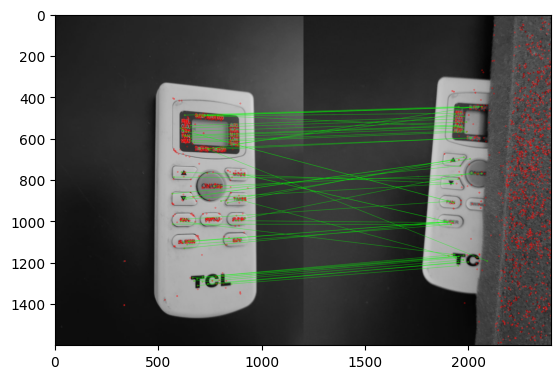

(<matplotlib.image.AxesImage at 0x7afd6d4ab550>, None)

In [39]:
# Cargar imágenes en escala de grises
img1 = cv.imread('vpc/control2.jpeg', cv.IMREAD_GRAYSCALE)          # Imagen de consulta (queryImage)
img2 = cv.imread('vpc/control3.jpeg', cv.IMREAD_GRAYSCALE) # Imagen de entrenamiento (trainImage)

# Iniciar el detector SIFT
sift = cv.SIFT_create()

# Encontrar los keypoints y descriptores con SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Parámetros FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # o pasar un diccionario vacío

# Iniciar FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Realizar emparejamientos kNN
matches = flann.knnMatch(des1, des2, k=2)

# Necesitamos dibujar solo los buenos emparejamientos, por lo que creamos una máscara
matchesMask = [[0, 0] for i in range(len(matches))]

# Test de proporción según el artículo de Lowe
# https://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Parámetros de dibujo para los emparejamientos
draw_params = dict(matchColor=(0, 255, 0),  # color de los emparejamientos
                   singlePointColor=(255, 0, 0),  # color de los puntos individuales
                   matchesMask=matchesMask,  # máscara para seleccionar emparejamientos
                   flags=cv.DrawMatchesFlags_DEFAULT)

# Dibujar los emparejamientos kNN
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

# Mostrar la imagen resultante
plt.imshow(img3), plt.show()

#Ejercicio 5

##Deteccion por diferencia de frames

In [ ]:
#!pip install -q mediapy
import mediapy as media  # Importar la biblioteca mediapy para manejo de medios
import cv2  # Importar OpenCV para el procesamiento de imágenes y videos
import numpy as np


# Función para oscurecer una imagen:
def process_image(new_image, prev_image, **kwargs):
    # Convertir la imagen a float32
    new_image_float = new_image.astype(np.float32)

    # Reducir el brillo de la imagen a la mitad
    new_image_float *= 0.5

    # Convertir la imagen de vuelta a uint8
    new_image_uint8 = np.clip(new_image_float, 0, 255).astype(np.uint8)

    return new_image_uint8

def draw_contours(frame, contours, color=(0, 255, 0), thickness=2):
    # Comprobar si la imagen es en escala de grises (1 canal)
    if len(frame.shape) == 2 or frame.shape[2] == 1:
        # Convertir la imagen de escala de grises a color (3 canales)
        result_image = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    else:
        # Si ya es una imagen de color, simplemente hacer una copia
        result_image = frame.copy()

    # Dibujar cada contorno en la imagen
    for contour in contours:
        # Obtener el rectángulo delimitador para cada contorno
        x, y, w, h = cv2.boundingRect(contour)
        # Dibujar el rectángulo
        cv2.rectangle(result_image, (x, y), (x + w, y + h), color, thickness)

    return result_image

# Función para procesar un video:
def video_processor(filename_in, filename_out, process_func, max_time=10, **kwargs):
    # Abrir el video de entrada para lectura
    with media.VideoReader(filename_in) as r:
        # Crear un archivo de video de salida
        with media.VideoWriter(filename_out, shape=r.shape, fps=r.fps, bps=r.bps) as w:
            count = 0  # Inicializar contador de fotogramas
            prev_image = None  # Inicializar la imagen previa

            # Iterar sobre cada imagen (fotograma) del video
            for image in r:
                new_image = media.to_uint8(image)  # Convertir la imagen a formato flotante

                # Comprobar si es la primera imagen
                if prev_image is None:
                    prev_image = new_image.copy()

                # Procesar la imagen utilizando la función dada
                processed_image = process_func(new_image, prev_image, **kwargs)

                # Añadir la imagen procesada al video de salida
                w.add_image(processed_image)

                # Actualizar la imagen previa
                prev_image = new_image.copy()

                # Incrementar el contador de fotogramas
                count += 1

                # Detener el proceso si se alcanza el tiempo máximo
                if count >= max_time * r.fps:
                    break


In [ ]:
# Función actualizada para detectar movimientos y dibujar cuadros delimitadores:
def process_frame_difference_full(new_image, prev_image, **kwargs):
    # Convertir las imágenes a escala de grises
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
    prev_gray = cv2.cvtColor(prev_image, cv2.COLOR_RGB2GRAY)

    # Calcular la diferencia absoluta entre los fotogramas actual y anterior
    frame_diff = cv2.absdiff(new_gray, prev_gray)

    # Normalizar la imagen de diferencia
    norm_diff = cv2.normalize(frame_diff, None, 0, 255, cv2.NORM_MINMAX)

    # Umbralizar la imagen para resaltar las diferencias
    _, thresh = cv2.threshold(norm_diff, 30, 255, cv2.THRESH_BINARY)

    # Dilatar la imagen umbralizada para mejorar la detección de contornos
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations = 1)

    # Convertir la imagen dilatada a formato adecuado para findContours
    dilated = dilated.astype(np.uint8)

    # Encontrar contornos en la imagen dilatada
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar cuadros delimitadores alrededor de los contornos
    if kwargs.get('draw_mode', 0) == 0:
      result_image = draw_contours(new_image, contours)
    elif kwargs.get('draw_mode', 0) == 1:
      result_image = draw_contours(thresh, contours)

    return result_image


filename_out = 'camara_patio_difference_full.mp4'

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, process_frame_difference_full,
                max_time=10, draw_mode=1)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)

# Llamar a la función para procesar el video
filename_out = 'camara_patio_difference_full.mp4'
video_processor(filename_in, filename_out, process_frame_difference_full,
                max_time=10, draw_mode=0)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)

##Deteccion por flujo optimo

###Flujo Disperso

In [ ]:
import mediapy

def process_sparse_optical_flow(new_image, prev_image):
    # Preparamos las imagenes de trabajo
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    prev_gray_image = cv2.cvtColor(prev_image, cv2.COLOR_BGR2GRAY)

    # Verificar si ya se han detectado las características de Shi-Tomasi
    if not hasattr(process_sparse_optical_flow, "shi_tomasi_done"):
        # Definir parámetros para la detección de esquinas de Shi-Tomasi
        feature_params = dict(maxCorners=300, qualityLevel=0.2, minDistance=2, blockSize=7)
        # Detectar puntos característicos en la imagen
        process_sparse_optical_flow.prev_points = cv2.goodFeaturesToTrack(new_gray, mask=None, **feature_params)
        # Crear una máscara para dibujar el flujo óptico
        process_sparse_optical_flow.mask = np.zeros_like(new_image)
        # Marcar que se ha completado la detección de Shi-Tomasi
        process_sparse_optical_flow.shi_tomasi_done = True

    # Continuar si se ha completado la detección de Shi-Tomasi
    if process_sparse_optical_flow.shi_tomasi_done:
        prev_points = process_sparse_optical_flow.prev_points
        mask = process_sparse_optical_flow.mask

    # Parámetros para el flujo óptico de Lucas-Kanade
    lk_params = dict(winSize=(15, 15), maxLevel=2,
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Calcular el flujo óptico de Lucas-Kanade
    new_points, status, error = cv2.calcOpticalFlowPyrLK(prev_gray_image, new_gray, prev_points, None, **lk_params)
    # Filtrar puntos buenos
    good_old = prev_points[status == 1]
    good_new = new_points[status == 1]
    color = (0, 255, 0)  # Color para el dibujo
    # Dibujar el movimiento (flujo óptico)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.astype(int).ravel()
        c, d = old.astype(int).ravel()
        mask = cv2.line(mask, (a, b), (c, d), color, 2)
        new_image = cv2.circle(new_image, (a, b), 3, color, -1)

    # Combinar la imagen actual con las líneas de flujo óptico dibujadas
    output = cv2.add(new_image, mask)
    # Actualizar puntos para el siguiente cuadro
    process_sparse_optical_flow.prev_points = good_new.reshape(-1, 1, 2)
    return output

filename_out = 'camara_patio_sparse_optical_flow.mp4'

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, process_sparse_optical_flow,
                max_time=10)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)

###Flujo Denso

In [ ]:
# Función para procesar el flujo óptico denso
def process_dense_optical_flow(new_image, prev_image):
    # Convierte la nueva imagen a escala de grises
    gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    if not hasattr(process_dense_optical_flow, "init_done"):
        process_dense_optical_flow.prev_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
        process_dense_optical_flow.mask = np.zeros_like(new_image)
        process_dense_optical_flow.mask[..., 1] = 255
        process_dense_optical_flow.init_done = True

    if process_dense_optical_flow.init_done:
        prev_gray = process_dense_optical_flow.prev_gray
        mask = process_dense_optical_flow.mask

    # Calcula el flujo óptico
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Computa magnitud y ángulo de los vectores 2D
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Establece el tono de la imagen según la dirección del flujo óptico
    mask[..., 0] = angle * 180 / np.pi / 2
    # Establece el valor de la imagen según la magnitud del flujo óptico
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    # Convierte de HSV a RGB
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    # Actualiza la imagen previa a gris
    process_dense_optical_flow.prev_grayprev_gray = gray.copy()
    return rgb

filename_out = 'camara_patio_dense_optical_flow.mp4'

# Llamar a la función para procesar el video
video_processor(filename_in, filename_out, process_dense_optical_flow,
                max_time=20)

# Mostrar el video resultante
media.show_video(media.read_video(filename_out), fps=30)

##Reflexión

***Detección de movimiento por diferecnia de frames:***

En la **detección de movimiento** cuando se ulilizo el método de diferencia de fotogramas resulto ser una técnica efectiva para identificar movimiento en el video. Al calcular la diferencia absoluta entre los fotogramas consecutivos y aplicar umbralización y dilatación, se pudo resaltar las regiones donde ocurrió el movimiento. Posteriormente, al encontrar y dibujar cuadros delimitadores alrededor de los contornos detectados, se obtuvo una representación de la actividad en el video.

Una de las principales ventajas es su simplicidad y eficiencia computacional. Sin embargo, la detección de movimiento basada únicamente en la diferencia de fotogramas puede ser susceptible a falsos positivos (como se logra ver en el video), especialmente en situaciones donde hay cambios en la iluminación o movimiento del fondo. Se logra ver en el video pequeños recuadros debido a pequeños movimientos de la planta o de partes dentro de la persona.


***Deteccion de movimiento por flujo óptimo:***

La aplicación de algoritmos de **flujo óptico**, tanto disperso como denso, agregó una dimensión adicional al análisis del movimiento en el video. El flujo óptico disperso permitió detectar y rastrear puntos característicos a lo largo de los fotogramas, proporcionando información sobre la dirección y la magnitud del movimiento en esos puntos. Se detectan puntos que no tienen que ver con la persona en movimiento.

Por otro lado, el flujo óptico denso, generó una visualización más completa del movimiento en todo el cuadro, asignando vectores de flujo a cada píxel. Esto ofreció una representación detallada de cómo cambia el contenido del video a lo largo del tiempo. Se ven ciertos errores en los colores en el seguimiento de la persona.

***Conclusion:***

Al analizar los resultados de ambas técnicas, es evidente que cada una tiene sus fortalezas y debilidades. La detección de movimiento es rápida y fácil de implementar, pero puede ser menos precisa en escenarios complejos. Por otro lado, el flujo óptico proporciona una comprensión más detallada del movimiento, pero puede ser más intensivo en términos computacionales.

#Ejercicio 6

***Diferencia entre localización de objetos y clasificación de imágenes:***

La principal diferencia es que en la clasificación de imágenes se centra en asignar una etiqueta general a toda la imagen, la localización de objetos se trata de detectar y delimitar la ubicación precisa de los objetos dentro de la imagen.

La clasificación de imágenes consiste en asignar una etiqueta o categoría a una imagen completa. El objetivo es determinar qué objetos o escenas están presentes en la imagen y asignarle una etiqueta correspondiente a cada una de ellas.

Por otro lado, la localización de objetos trata de identificar y delimitar la ubicación de uno o varios objetos dentro de una imagen. Además de clasificar los objetos presentes, la tarea implica también proporcionar información sobre la ubicación exacta de dichos objetos en la imagen.

**Ejemplos:**

**Clasificación de Imágenes:**

Dado un conjunto de imágenes de animales que incluye gatos, perros y pájaros, un modelo de clasificación de imágenes podría predecir que una imagen particular contiene un perro.

Un modelo de clasificación de imágenes entrenado para reconocer frutas puede identificar si una imagen contiene una manzana, una naranja o una banana.

Un sistema de clasificación de imágenes puede determinar si una fotografía pertenece a una playa, un bosque o una montaña basándose en las características visuales presentes en la imagen.

**Localización de Objetos:**

Utilizando un modelo de detección de objetos, se puede identificar y delimitar la ubicación de los rostros de las personas en una imagen.

Un modelo de detección de objetos puede identificar y delimitar la ubicación de los automóviles en una imagen de tráfico urbano.

Un sistema de seguridad puede utilizar la localización de objetos para detectar la presencia de personas en una habitación y señalar su ubicación exacta en un video de vigilancia.

